In [1]:
import sys

ROOT_DIR = '..'
sys.path.append(ROOT_DIR)

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utils.evolution_functions import next_finite_drift_generation

In [5]:
from utils.evolution_functions import generate_random_samples
from utils.statistic_utils import run_chi_squared_test

def run_exp(p0_list, q0_list, pop_size_list, n_loci, t, u=0, v=0, n=1):
    ehw_gens = {}
    extinctions_gens = {}
    for p0, q0 in zip(p0_list, q0_list):
        for pop_size in pop_size_list:
            p_t_list = []
            q_t_list = []
            p2_t_list = []
            q2_t_list = []
            pq_t_list = []
            chi_squared_list = []
            for pop in range(n_loci):
                p_t = np.zeros(t.shape)
                q_t = np.zeros(t.shape)
                chi_squared = np.zeros(t.shape[0] - 1)
                p_t[0] = p0
                q_t[0] = q0
                expected = generate_random_samples(p0, q0, pop_size)
                dict_key = f"N_pop={pop}, Pop_Size={pop_size} Pop={p0:.4f}x{q0:.4f}"
                for i in range(1, t.shape[0]):
                    p, q = next_finite_drift_generation(p_t[i-1], q_t[i-1], u, v, pop_size, seed=int(time.time()))
                    p_t[i] = p
                    q_t[i] = q

                    # Avaliar extinção
                    if p == 0 or q == 0 and not extinctions_gens.get(dict_key, None):
                        print(f"Extinction in gen {i}")
                        extinctions_gens[dict_key] = i
                    
                    # Valor de variância máxima -> Deriva máxima

                    observed = generate_random_samples(p, q, pop_size)
                    chi_2, is_correlated = run_chi_squared_test(observed, expected, n)
                    if not is_correlated and not ehw_gens.get(dict_key, None):
                        print(f"Not in EHW in gen {i}")
                        ehw_gens[dict_key] = i
                    
                    chi_squared[i - 1] = chi_2

                p_t_list.append(p_t)
                q_t_list.append(q_t)

                p2_t_list.append(p_t ** 2)
                q2_t_list.append(q_t ** 2)
                pq_t_list.append(2 * p_t * q_t)
                chi_squared_list.append(chi_squared)

                # Avaliar pontos de equilíbrio
                # plt.plot(t, p, label='Locus %d'%i)
            
            fig = plt.figure()
            ax = plt.subplot(111)

            for i, p in enumerate(p_t_list):
                ax.plot(t, p, label=f'p_{i+1}')

            # Shrink current axis by 20%
            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

            # Put a legend to the right of the current axis
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            ax.title.set_text(f'Pop size: {pop_size}')
            plt.show()

            # plt.plot(t, p2_t_list, label='p²')
            # plt.plot(t, q2_t_list, label='q²')
            # plt.plot(t, pq_t_list, label='2pq')

            # plt.legend()
            # plt.show()

    if ehw_gens:
        for key, value in ehw_gens.items():
            print(f"End of EHW ({key}) Gen = {value}")

# Avaliar

- Atividade
    * 30 simulações (30 populações/loci) com N de 5 a 200, p0=0.5
    * Calcular o número de fixações e extinções
    * Avaliar a relação entre N e esses números
    * Avaliar a relação entre N e o número médio de gerações até fixação
- EHW

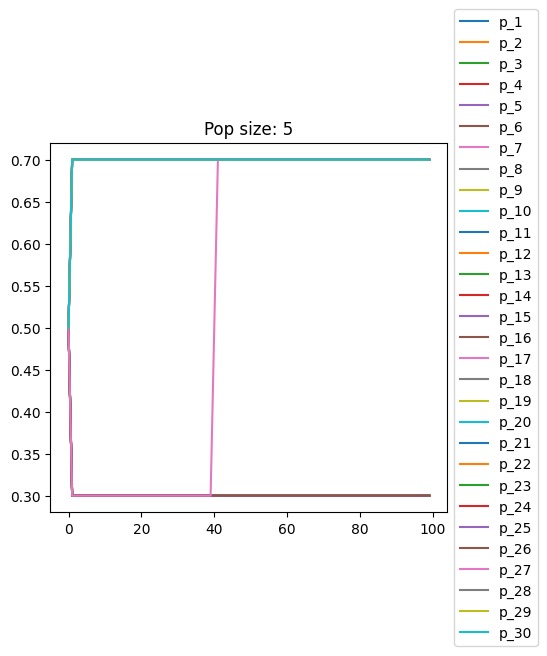

Not in EHW in gen 8
Not in EHW in gen 8
Not in EHW in gen 8
Not in EHW in gen 8
Not in EHW in gen 8
Extinction in gen 99
Not in EHW in gen 29
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2


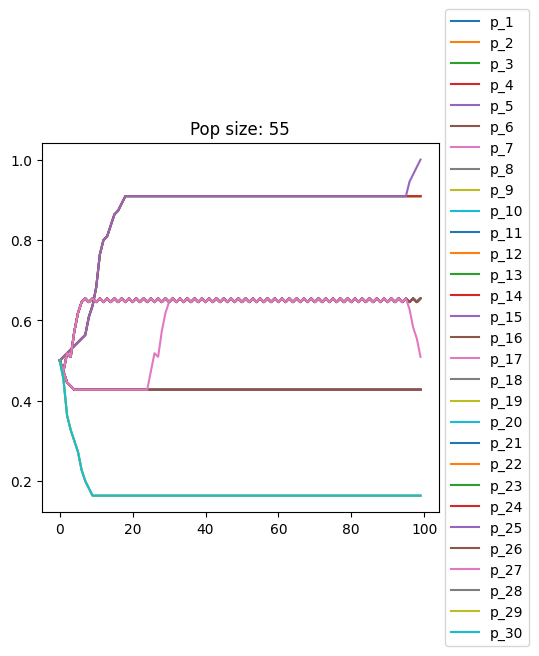

Not in EHW in gen 80
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 64


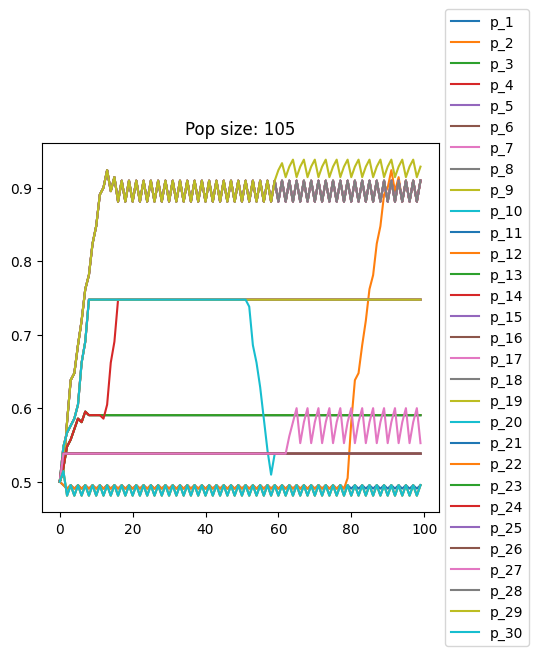

Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 67
Not in EHW in gen 38
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4


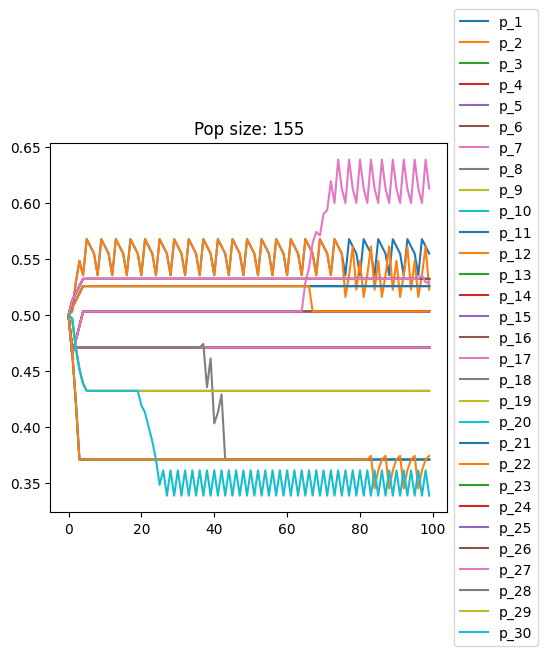

End of EHW (N_pop=0, Pop_Size=55 Pop=0.5000x0.5000) Gen = 8
End of EHW (N_pop=1, Pop_Size=55 Pop=0.5000x0.5000) Gen = 8
End of EHW (N_pop=2, Pop_Size=55 Pop=0.5000x0.5000) Gen = 8
End of EHW (N_pop=3, Pop_Size=55 Pop=0.5000x0.5000) Gen = 8
End of EHW (N_pop=4, Pop_Size=55 Pop=0.5000x0.5000) Gen = 8
End of EHW (N_pop=16, Pop_Size=55 Pop=0.5000x0.5000) Gen = 29
End of EHW (N_pop=17, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=18, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=19, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=20, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=21, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=22, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=23, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=24, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=25, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=26, Pop_Size=55 Pop=0.5000x0.5000) Gen = 5
End of EHW (N_pop=27, Pop_Si

In [7]:
n = 1 # Degrees of freedom

n_loci = 30 # Number of loci, quantity of distinct populations
pop_size_list = [i for i in range(5, 200, 50)]
# pop_size_list = [140]
t = np.arange(1e2).astype(int) # Number of generations
p0_list = [0.5]
q0_list = [1 - p0 for p0 in p0_list]

run_exp(p0_list, q0_list, pop_size_list, n_loci, t)


# Responder

Sobre a deriva gênica, avaliar:
- A influência do tamanho da população (deriva mais forte ou mais fraca...)
- Quais são as frequências gênicas para uma população sofrer máxima deriva?
- A influência das frequências gênicas (p e q)
- Presença de pontos de equilíbrio

Not in EHW in gen 4
Not in EHW in gen 31
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 59
Not in EHW in gen 6
Not in EHW in gen 6
Not in EHW in gen 6
Not in EHW in gen 6
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 51
Not in EHW in gen 6
Not in EHW in gen 6
Not in EHW in gen 6


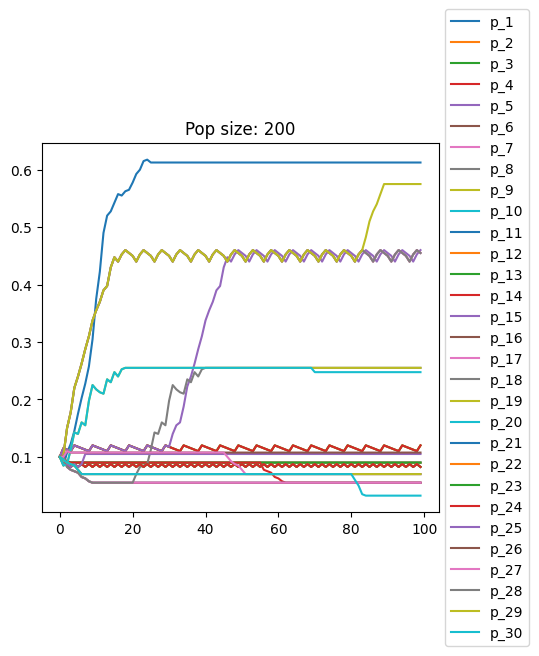

Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 1
Not in EHW in gen 1
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 5
Not in EHW in gen 1
Not in EHW in gen 1
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 3


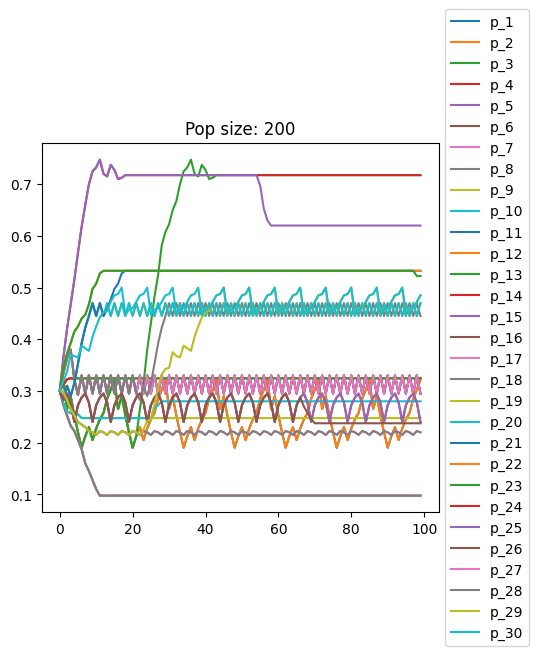

Not in EHW in gen 4
Not in EHW in gen 7
Not in EHW in gen 7
Not in EHW in gen 7
Not in EHW in gen 7
Not in EHW in gen 3
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 6
Not in EHW in gen 6
Not in EHW in gen 6
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3


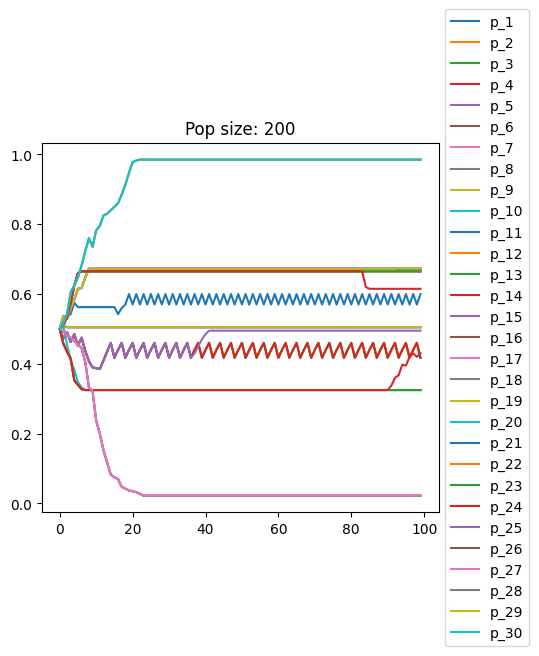

Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 4
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 23
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 3


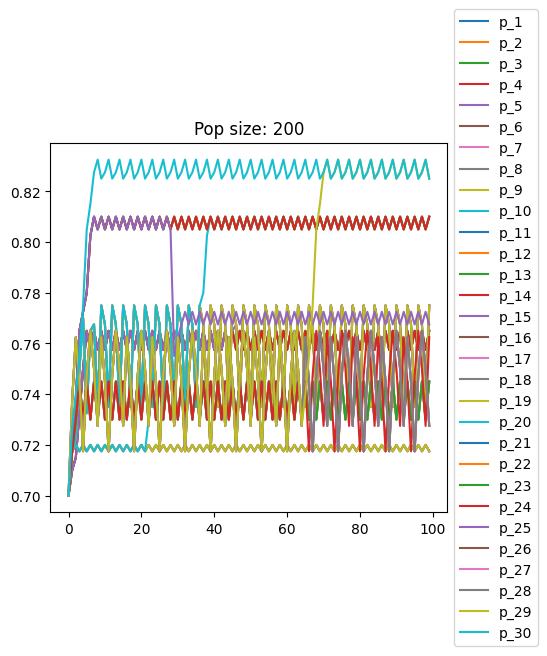

Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 32
Not in EHW in gen 1
Not in EHW in gen 1
Not in EHW in gen 1
Not in EHW in gen 1
Not in EHW in gen 1
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Not in EHW in gen 3
Extinction in gen 32
Not in EHW in gen 1
Extinction in gen 8
Not in EHW in gen 1
Extinction in gen 8
Not in EHW in gen 1
Extinction in gen 8
Not in EHW in gen 1
Extinction in gen 8
Not in EHW in gen 1
Extinction in gen 8
Not in EHW in gen 2
Not in EHW in gen 2
Not in EHW in gen 2


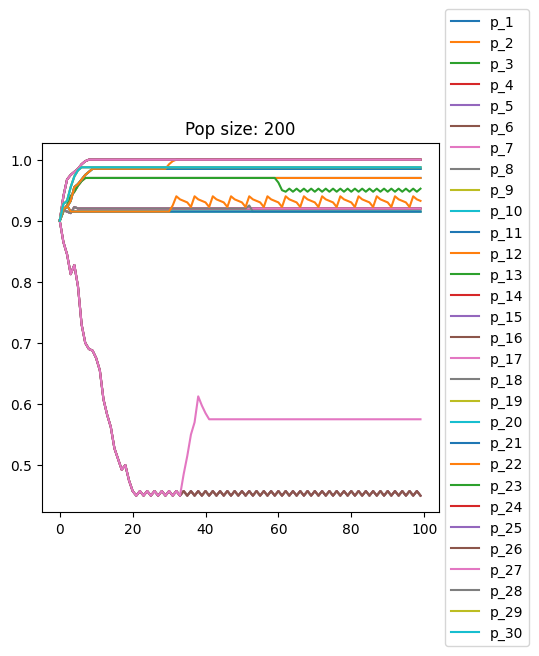

End of EHW (N_pop=0, Pop_Size=200 Pop=0.1000x0.9000) Gen = 4
End of EHW (N_pop=4, Pop_Size=200 Pop=0.1000x0.9000) Gen = 31
End of EHW (N_pop=5, Pop_Size=200 Pop=0.1000x0.9000) Gen = 2
End of EHW (N_pop=6, Pop_Size=200 Pop=0.1000x0.9000) Gen = 2
End of EHW (N_pop=7, Pop_Size=200 Pop=0.1000x0.9000) Gen = 2
End of EHW (N_pop=8, Pop_Size=200 Pop=0.1000x0.9000) Gen = 2
End of EHW (N_pop=13, Pop_Size=200 Pop=0.1000x0.9000) Gen = 59
End of EHW (N_pop=14, Pop_Size=200 Pop=0.1000x0.9000) Gen = 6
End of EHW (N_pop=15, Pop_Size=200 Pop=0.1000x0.9000) Gen = 6
End of EHW (N_pop=16, Pop_Size=200 Pop=0.1000x0.9000) Gen = 6
End of EHW (N_pop=17, Pop_Size=200 Pop=0.1000x0.9000) Gen = 6
End of EHW (N_pop=18, Pop_Size=200 Pop=0.1000x0.9000) Gen = 4
End of EHW (N_pop=19, Pop_Size=200 Pop=0.1000x0.9000) Gen = 4
End of EHW (N_pop=26, Pop_Size=200 Pop=0.1000x0.9000) Gen = 51
End of EHW (N_pop=27, Pop_Size=200 Pop=0.1000x0.9000) Gen = 6
End of EHW (N_pop=28, Pop_Size=200 Pop=0.1000x0.9000) Gen = 6
End of EHW 

In [9]:
n = 1 # Degrees of freedom

n_loci = 30 # Number of loci, quantity of distinct populations
# 140 deu um resultado bem estranhos
# pop_size_list = [i for i in range(5, 200, 50)]
pop_size_list = [200]
t = np.arange(1e2).astype(int) # Number of generations
p0_list = [i for i in np.arange(0.1, 1, 0.2)]
q0_list = [1 - p0 for p0 in p0_list]

run_exp(p0_list, q0_list, pop_size_list, n_loci, t)